In this notebook I want to present how Linear Regression algorithm works. This implementation should not be used for real problems as it's slower than excelent available tools like e.g. sci-kit learn.

In [38]:
from sklearn.datasets import make_regression
from sklearn import linear_model

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 

### Constants

In [39]:
DATA_NUM = 1000

### Generate problem

In [40]:
def generate_linear_regression_problem(samples_num):
    """Function that uses 'make_regression' of sklearn as a core. It's purpose it to 
    generate point that can be aproximated by linear function. Returns tuple of data 
    and it's labels.
    
    Arguments:
    ---------
    samples_num: int
        Numer of points that should be generated.
    """
    bias = np.random.uniform(-5, 5)
    data_noise = np.random.uniform(4, 8)
    x_values, y_values = make_regression(n_samples=samples_num, n_features=1, noise=data_noise, 
                                         bias=bias)
    
    return x_values, y_values.reshape(-1, 1)

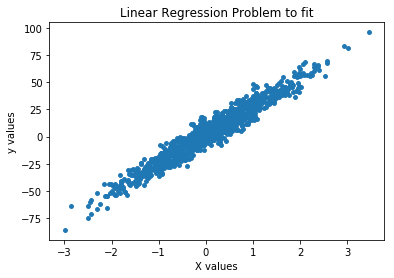

In [41]:
# Generating values 'X' and labels 'y'
X, y = generate_linear_regression_problem(DATA_NUM)

# Presenting generated data
plt.scatter(X, y, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("X values")
plt.ylabel("y values")
plt.show()

### Linear Regression -  Raw implementation

In [42]:
class LinearRegression:
    """Linear Regression model.
    
    Arguments:
    ---------
    iterations: int
        Number of Gradient Descent Steps that will be performed in order to change weights of
        linear model
    learning_rate: float
        Weight applied for Gradient Descent Step during updating weights. (default: 0.001)
    normalize: boolean
        Flag for normalization. If set to true data will be scaled to values which mean is close
        to 0 and standard deviation close to 1. 
    verbose: boolean
        Flag for debugging. If set to true then error values achieved by model during training
        cycle will be displayed.
    """
    def __init__(self, iterations, learning_rate=0.001, normalize=False, 
                 verbose=False):
        self.w = None
        self._normalize_mean = None
        self._normalize_std = None
        
        self.error_history = list()
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.normalize = normalize
        self.verbose = verbose
        
    def fit(self, X, y):
        """Function that is adjusting Linear Regression Model weights 'w' to inserted data 'X'
        according to target values 'y'."""
        
        # Ensure data is float type
        X = X.astype(np.float32)
        y = y.astype(np.float32)
        
        if self.normalize:
            # Scaling X values
            self._normalize_mean = X.mean()
            self._normalize_std = X.std()
            X = self._normalize(X)
        
        # Insert 1 values in first row of data for bias
        X = np.insert(X, 0, 1, axis=1)
        
        # Creating weight for each feature in dataset
        self.w = np.zeros((X.shape[1], 1))
        
        # Updating weights by Gradient Descent
        for i in range(self.iterations):
            
            # Gradient step - Calculating gradient
            pred = np.dot(X, self.w)
            gradient = (1 / len(X)) * (np.dot(X.T, pred - y))
            
            # Gradient step - Updating weights
            self.w = self.w - self.learning_rate * gradient
            
            # Calculating error for new weights
            error = self._mse(X, y)
            self.error_history.append(error)
            
            # Displaying learning progress every 100 iterations
            if self.verbose and i % 100 == 0:
                print("Iteration no. " + str(i) + ", error: " + str(error))
    
    def _normalize(self, X):
        """Feature scaling for input matrix 'X' for avoiding gradient overflow."""
        return (X - self._normalize_mean) / self._normalize_std
        
    def _mse(self, X, y):
        """Implementation of Mean Squared Errors - cost function for monitoring how Polynomial Model
        is performing with current 'w' values"""
        
        # Calculating Mean Squared Error
        pred = np.dot(X, self.w)
        mean_square_error = (1 / (2 * len(X))) * np.sum(np.square(pred - y))
        
        return mean_square_error
    
    def predict(self, X):
        """Function that takes feature values 'X' and returns predictions with usage of 
        current 'w' values"""
        
        # Ensure data is float type
        X = X.astype(np.float32)
        
        if self.normalize:
            # Scaling X values
            X = self._normalize(X)
        
        # Insert 1 values in first row of data for bias
        X = np.insert(X, 0, 1, axis=1)
        pred = np.dot(X, self.w)
        return pred
        

### Training model to fit generated data

Hyperparameters


In [43]:
iterations = 5000

Fitting to generated data

In [44]:
linear_regression_model = LinearRegression(iterations, normalize=True, verbose=True)
linear_regression_model.fit(X, y)

Iteration no. 0, error: 352.880243892
Iteration no. 100, error: 292.728307309
Iteration no. 200, error: 243.484994643
Iteration no. 300, error: 203.172014212
Iteration no. 400, error: 170.169839842
Iteration no. 500, error: 143.152648319
Iteration no. 600, error: 121.035056016
Iteration no. 700, error: 102.928514897
Iteration no. 800, error: 88.1056161457
Iteration no. 900, error: 75.9708673866
Iteration no. 1000, error: 66.0367694803
Iteration no. 1100, error: 57.9042318258
Iteration no. 1200, error: 51.2465393685
Iteration no. 1300, error: 45.79622721
Iteration no. 1400, error: 41.3343355239
Iteration no. 1500, error: 37.6816131036
Iteration no. 1600, error: 34.6913161582
Iteration no. 1700, error: 32.2433130545
Iteration no. 1800, error: 30.2392581714
Iteration no. 1900, error: 28.5986409807
Iteration no. 2000, error: 27.2555516327
Iteration no. 2100, error: 26.1560331058
Iteration no. 2200, error: 25.2559135473
Iteration no. 2300, error: 24.5190317215
Iteration no. 2400, error: 23.

Training results

In [45]:
# Trained weights of Linear Model - w0 + w1 * x
print(linear_regression_model.w)

[[  3.29053781]
 [ 25.39628472]]


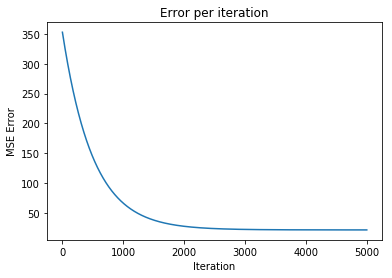

In [46]:
# Model learning history
plt.plot(linear_regression_model.error_history)
plt.title("Error per iteration")
plt.ylabel('MSE Error')
plt.xlabel('Iteration')
plt.show()

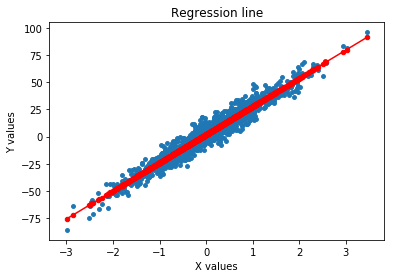

In [47]:
# Displaying dataset
plt.scatter(X, y, s=15)

# Displaying aproximated function
function_x = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)

plt.plot(function_x, linear_regression_model.predict(function_x), c="red")
plt.scatter(X, linear_regression_model.predict(X), s=20, c='red')

plt.title("Regression line")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()